In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("fish.csv")

In [3]:
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [4]:
col=['species','a','b','c','d','e','f']

In [5]:
df=pd.read_csv("fish.csv",names=col)

In [6]:
df

,species,a,b,c,d,e,f
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [7]:
df.shape

(85, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  85 non-null     object 
 1   a        85 non-null     float64
 2   b        85 non-null     float64
 3   c        85 non-null     float64
 4   d        85 non-null     float64
 5   e        85 non-null     float64
 6   f        85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [9]:
df.isna().sum()

species    0
a          0
b          0
c          0
d          0
e          0
f          0
dtype: int64

In [10]:
df.iloc[:,[0,0]].nunique()

species    4
species    4
dtype: int64

In [12]:
df['species'].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [13]:
df=pd.get_dummies(df)

In [14]:
df

,a,b,c,d,e,f,species_Bream,species_Pike,species_Roach,species_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,1,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,1,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,1,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2,0,1,0,0
81,1250.0,52.0,56.0,59.7,17.9,11.7,0,1,0,0
82,1600.0,56.0,60.0,64.0,15.0,9.6,0,1,0,0
83,1550.0,56.0,60.0,64.0,15.0,9.6,0,1,0,0


In [15]:
from sklearn.cluster import KMeans

In [16]:
WCSS=[]

In [17]:
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
    #init means initialization method

E:\PYTHON\arathi\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


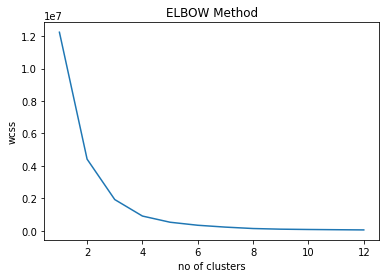

In [18]:
plt.plot(range(1,13),WCSS)
plt.title("ELBOW Method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)

In [20]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3])

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_sc=silhouette_score(df,y_kmeans)
print(silhouette_sc)

0.6077749747794599
